# **Project: Customer Churn Prediction**

# **Introduction :**

Customer churn prediction is an important application of machine learning that helps organizations identify customers who are likely to stop using their services. By analyzing customer demographic details, service usage patterns, and payment information, patterns can be identified that indicate possible churn behavior.

In this project, a machine learning model is developed using Python and Google Colab to predict customer churn based on various features such as tenure, contract type, monthly charges, and services used. Data preprocessing, visualization, and classification algorithms are applied to build an accurate predictive model.



## **Step 1: Upload Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()


Saving churn_data.csv to churn_data.csv


## **STEP 2: Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **STEP 3: Load Dataset**

In [4]:
df = pd.read_csv("churn_data.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **STEP 4: Understand Dataset**

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Step 5: Describe**

In [6]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **STEP 6: Check Missing Values**

In [7]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df = df.dropna()


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## **STEP 7: Data Cleaning**

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


## **STEP 8: Import Visualization Libraries**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


## **STEP 9:**
## Graph 1 – Churn Distribution

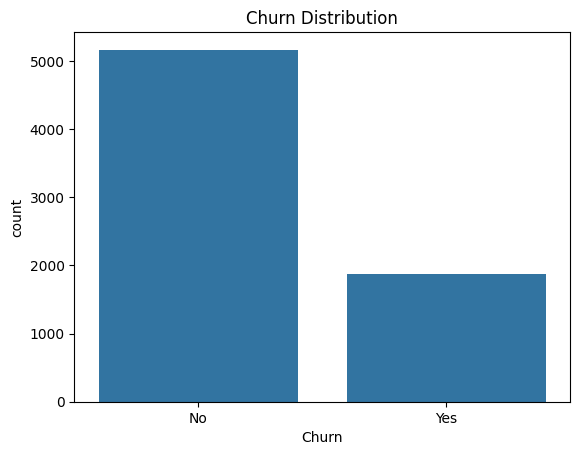

In [13]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


## **STEP 10:**
## Graph 2 – Gender vs Churn


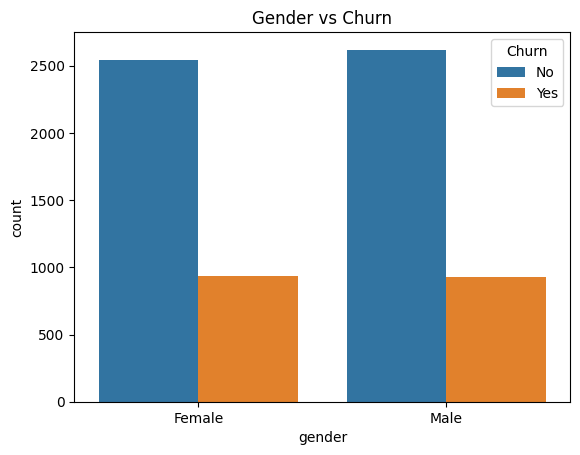

In [14]:
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Gender vs Churn")
plt.show()


## **STEP 11:**
## Graph 3 – Contract Type vs Churn

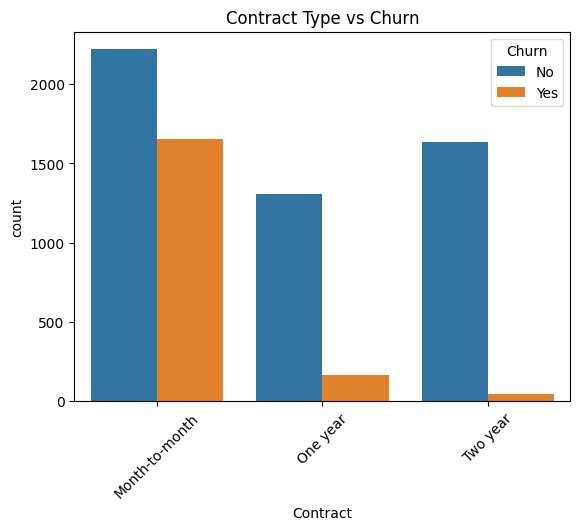

In [15]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()


## **STEP 12:**
## Graph 4 – Internet Service vs Churn

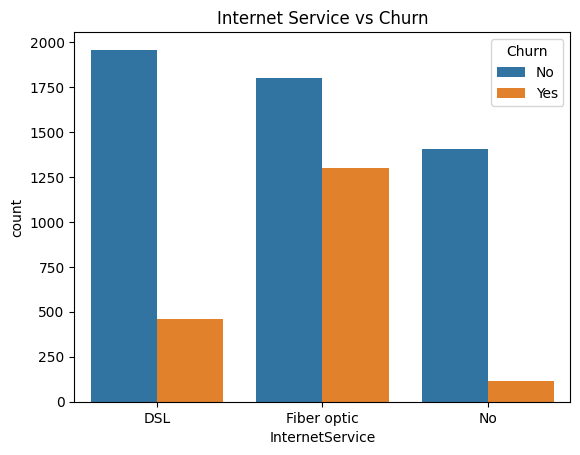

In [16]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.show()


## **STEP 13:**
## Graph 5 – Monthly Charges Distribution

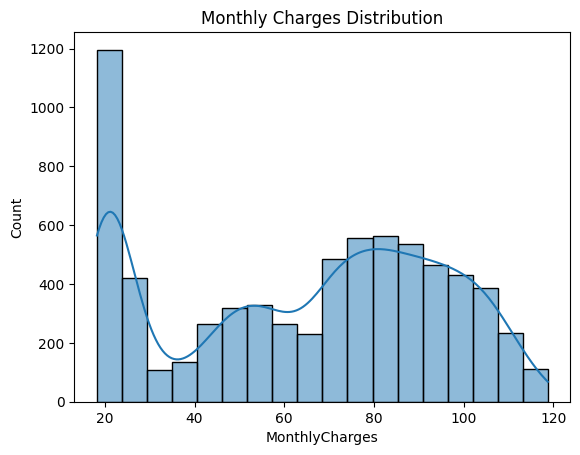

In [17]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


## **STEP 14:**
## Graph 6 – Tenure vs Churn (Boxplot)

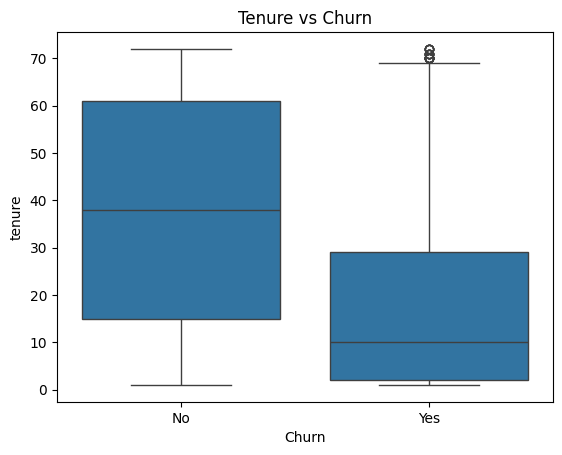

In [18]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


## **STEP 15:**
## Graph 7 – Correlation Heatmap

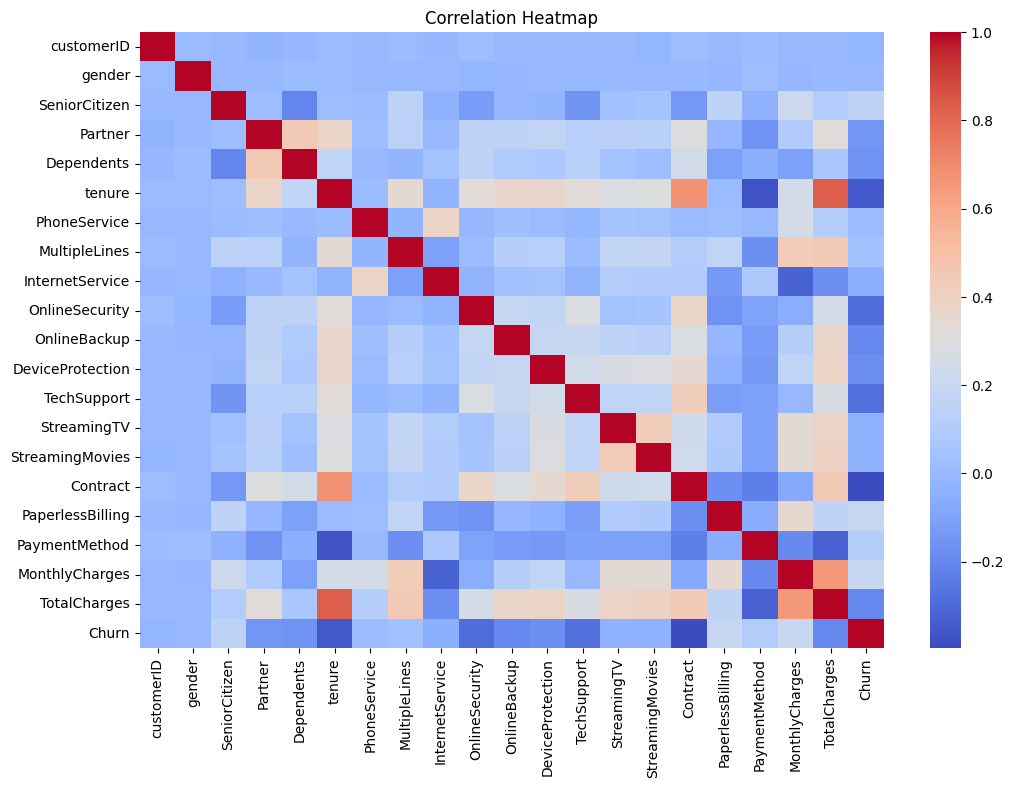

In [19]:
df_numeric = df.copy()

for col in df_numeric.select_dtypes(include='object').columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## **STEP 16: Data Preprocessing for Machine Learning**

In [20]:
df_ml = df.copy()

df_ml = pd.get_dummies(df_ml, drop_first=True)
df_ml.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


## **STEP 17: Split Features and Target**

In [21]:
X = df_ml.drop('Churn_Yes', axis=1)
y = df_ml['Churn_Yes']


## **STEP 18: Train-Test Split**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **STEP 19: Train Model (Random Forest)**

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

## **STEP 20: Prediction**

In [24]:
y_pred = model.predict(X_test)


## **STEP 21: Model Evaluation**

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7910447761194029
              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1033
        True       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



## **STEP 22: Confusion Matrix Graph**

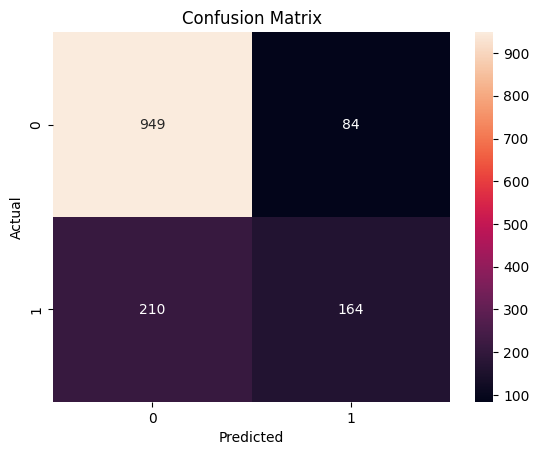

In [26]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **STEP 23: Feature Importance Graph**

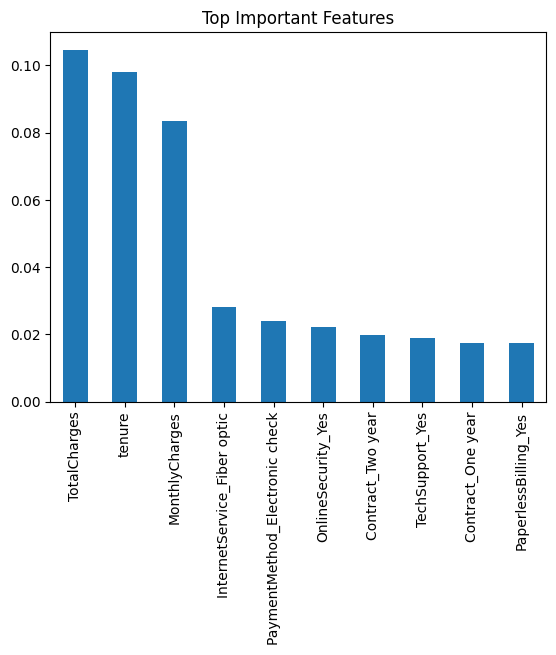

In [27]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Important Features")
plt.show()


## **STEP 24: Prediction using - Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7910447761194029


## **STEP 25: Accuracy Comparison Graph**

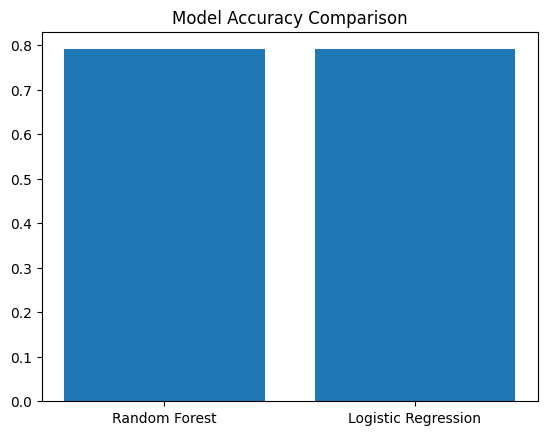

In [31]:
rf_acc = accuracy_score(y_test, y_pred)
lr_acc = accuracy_score(y_test, y_pred_lr)

models = ['Random Forest', 'Logistic Regression']
accuracy = [rf_acc, lr_acc]

plt.bar(models, accuracy)
plt.title("Model Accuracy Comparison")
plt.show()


# **Conclusion :**

This project successfully demonstrates how machine learning techniques can be used to predict customer churn. Through data cleaning, exploratory data analysis, and model training, meaningful patterns influencing customer behavior were identified.

 The Random Forest and Logistic Regression models were evaluated to measure prediction accuracy, and visualization techniques helped in understanding the factors that contribute most to churn. This project highlights the importance of predictive analytics in helping businesses improve customer retention and make data-driven decisions.

# **----------  THE END ----------**